Utilizar o Sarimax, criar a previsão e verificar o erro medio absoluto

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

In [10]:
from pmdarima.arima import auto_arima
from xgboost import XGBRegressor

In [8]:
!pip install scipy

In [9]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.8 MB/s eta 0:00:00


In [11]:
# Já convertendo a coluna de date no index do dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Series Temporais/temperature.xlsx', index_col='Date', parse_dates=True)

In [12]:
df.head()

,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-02-01,17.9
1981-03-01,18.8
1981-04-01,14.6
1981-05-01,15.8


In [111]:
df.info()
# Data como obsjeto

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3647 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily minimum temperatures  3647 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [112]:
df.shape

(3647, 1)

In [13]:
# analisando o inicio e fim
df.index.min(), df.index.max()

(Timestamp('1981-01-01 00:00:00'), Timestamp('1990-12-31 00:00:00'))

In [14]:
# Renomeando a coluna
# df['Daily minimum temperatures'] = df['Daily minimum temperatures'].astype(float)

df = df.rename(columns={'Daily minimum temperatures': 'Temperatura'})
df['Temperatura'] = df['Temperatura'].astype(float)

<Axes: xlabel='Date'>

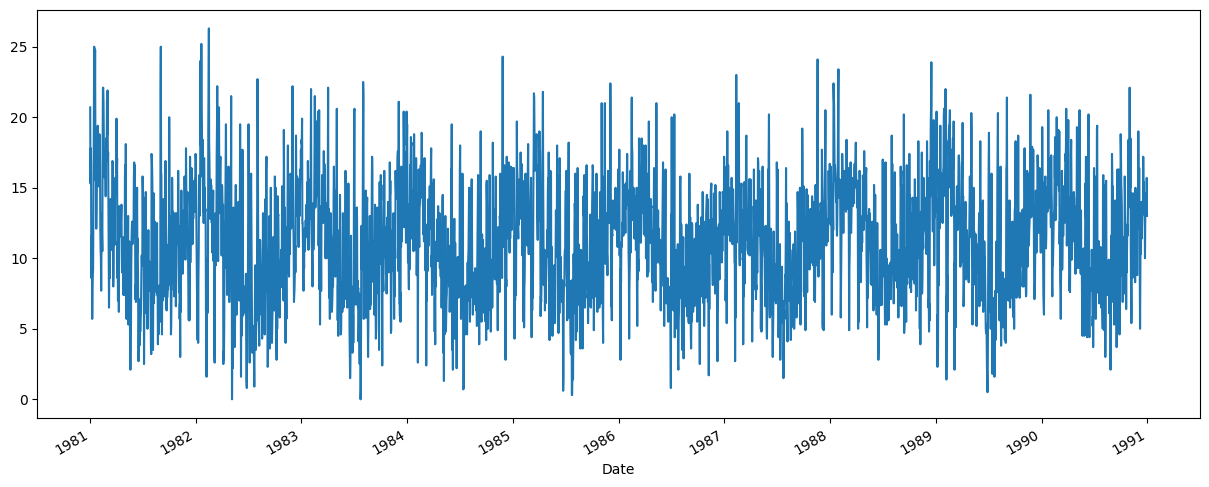

In [15]:
df['Temperatura'].plot(figsize=(15,6))
# Podemos ver que temos sim uma grande sasonalidade em períodos de tempo

In [16]:
# Precisamos ordenar o dataset para as metricas sairem corretas
df.sort_index(inplace=True)

<Figure size 1000x600 with 0 Axes>

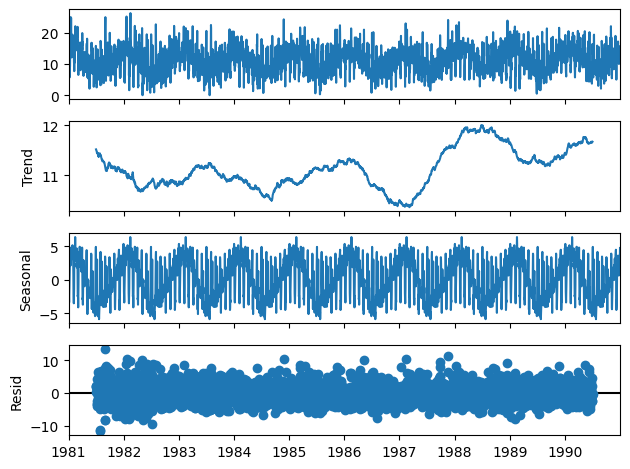

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

resultado = seasonal_decompose(df, model='add', period=365)

fig = plt.figure(figsize=(10,6))

fig = resultado.plot()

Testes de estacionariedade

In [18]:
# Verificando o P valor

from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Temperatura'].dropna())
print(f'Teste ADF: {result[0]}')
print(f'Teste ADF: {result[1]}')

# Notado que P valor deu um valor bem abaixo de 5%, podemos continuar

Teste ADF: -3.331541412968857
Teste ADF: 0.01352611219545271


In [123]:
df.head()

,Temperatura
Date,
1981-01-01,20.7
1981-01-02,15.3
1981-01-03,17.8
1981-01-04,16.7
1981-01-05,8.6


## Parametros Arima

In [19]:
fit_arima = auto_arima(df, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                       seasonal=True,
                       m=6,
                       D=1,
                       start_P=1,
                       start_Q=1,
                       max_P=2,
                       max_Q=2,
                       information_criterion="aic",
                       trace=True,
                       error_action="ignore",
                       stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=inf, Time=19.07 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=22211.573, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=20978.709, Time=0.72 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=4.87 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=22068.931, Time=0.22 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=20482.431, Time=1.81 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=12.77 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=6.09 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=20662.364, Time=0.95 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=20418.687, Time=1.96 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=20927.151, Time=1.12 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=19.61 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=8.18 sec
 ARIMA(3,1,0)(2,1,0)[6]             : AIC=20352.684, Time=2.35 sec
 ARIMA(3,1,0)(1,1,0)[6]             : AIC=20872.994,

Visto que os melhores foram: (3,1,0)

## Treinando o modelo

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df, order=(3,1,0), seasonal_order=(1,1,2,6))
resultado_sarimax = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [21]:
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                            Temperatura   No. Observations:                 3647
Model:             SARIMAX(3, 1, 0)x(1, 1, [1, 2], 6)   Log Likelihood               -9612.386
Date:                                Mon, 29 Jan 2024   AIC                          19238.772
Time:                                        17:04:34   BIC                          19282.170
Sample:                                             0   HQIC                         19254.229
                                               - 3647                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2926      0.015    -19.255      0.000      -0.322      -0.263
ar.L2         -0.1735      0.015    -11.279      0.000      -0.204      -0.143
ar.L3         -0.1211      0.016     -7.701      0.000      -0.152      -0.090
ar.S.L6       -0.9364      0.032    -28.920      0.000      -1.000      -0.873
ma.S.L6       -0.0443      0.032     -1.403      0.161      -0.106       0.018
ma.S.L12      -0.9544      0.031    -30.997      0.000      -1.015      -0.894
sigma2        11.4002      0.281     40.579      0.000      10.850      11.951
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):               102.37
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.03
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Verificando se a previsão do modelo está boa

In [23]:
# Colocando para 12 meses anteriores
predicoes = resultado_sarimax.get_prediction(start=-12)
predicao_media = predicoes.predicted_mean

In [25]:
intervalo_condianca = predicoes.conf_int()
limite_abaixo = intervalo_condianca.iloc[:,0]
limite_acima = intervalo_condianca.iloc[:,1]

limite_abaixo[0], limite_acima[0]

(8.317121523316388, 21.55957161944415)

In [28]:
predicao_media[0]

14.938346571380269

In [39]:
datas

array(['1981-01-01T00:00:00.000000000', '1981-01-02T00:00:00.000000000',
       '1981-01-03T00:00:00.000000000', ...,
       '1990-12-29T00:00:00.000000000', '1990-12-30T00:00:00.000000000',
       '1990-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

## Predição


In [30]:
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

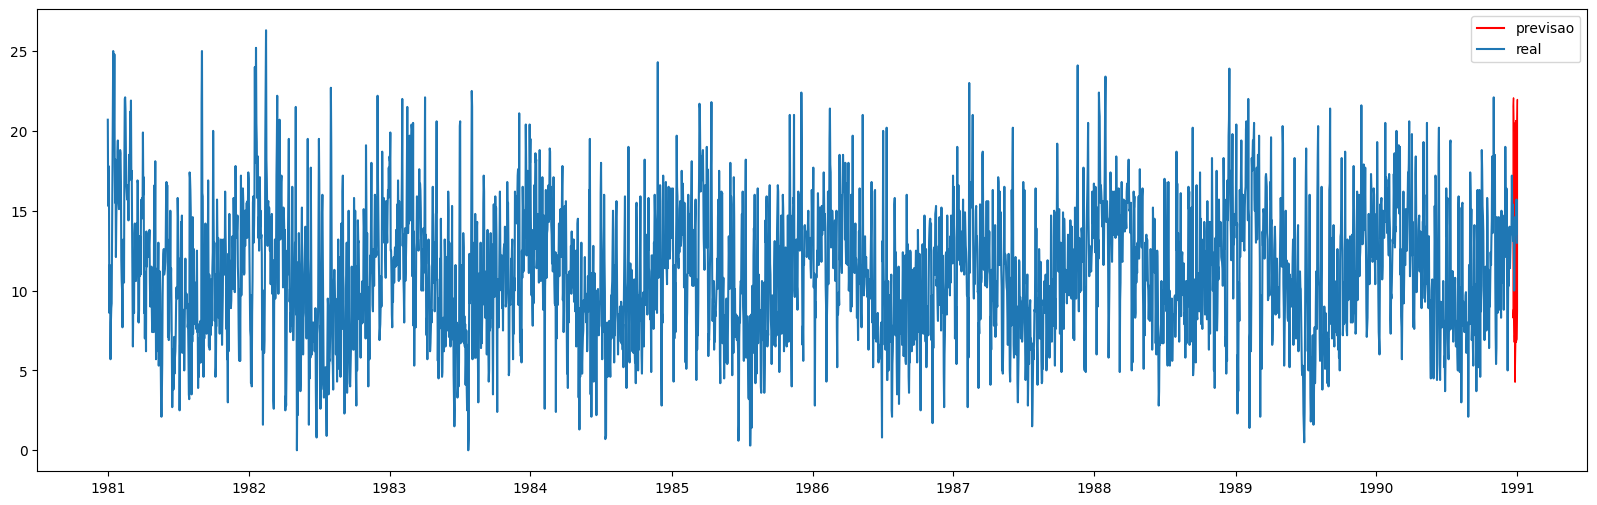

In [35]:
# Configurando o gráfico de plotagem
plt.figure(figsize=(20,6))
plt.plot(datas_previsao,predicao_media.values, color='red', label='previsao')

plt.fill_between(datas_previsao, limite_abaixo, limite_acima, color= 'red')
plt.plot(datas,df.values, label='real')
plt.legend()
plt.show()

parece que a previsão não foi muito bem e não acertou muito.

In [38]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df[-12:].values, predicao_media.values)
print(mae)

1.3813551624402056


## Prevendo o Futuro

In [48]:
forcast = resultado_sarimax.get_forecast(steps=12)
forcast_medio = forcast.predicted_mean
forcast_medio.size

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


12

In [49]:
intervalo_confianca_forcast = forcast.conf_int()
intervalo_abaixo_f = intervalo_confianca_forcast.iloc[:,0]
intervalo_acima_f = intervalo_confianca_forcast.iloc[:,1]

intervalo_abaixo_f[0], intervalo_acima_f[0]

KeyError: 0